In [1]:
from DA import Import, Anova
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
column_names = {"doorlooptijd [s]":"Handbagage", 
                    "doorlooptijd [s].1":"Bodyscan",
                    "doorlooptijd [s].2":"Douane"}

n = 10
a = 3
alpha = 0.05

In [3]:
Data = Import("Data.xlsx", alpha, column_names, n)
df, df_melt, names, mean, std = Data.import_df()

In [4]:
df_melt

,index,treatment,value,means
0,0,Handbagage,200,206.5
1,1,Handbagage,207,206.5
2,2,Handbagage,191,206.5
3,3,Handbagage,215,206.5
4,4,Handbagage,220,206.5
5,5,Handbagage,205,206.5
6,6,Handbagage,225,206.5
7,7,Handbagage,157,206.5
8,8,Handbagage,220,206.5
9,9,Handbagage,225,206.5


In [5]:
means = np.mean(df_melt['value'].values)
stds = np.std(df_melt['value'].values)
print(means, stds)

203.73333333333332 23.884350990182302


In [6]:
var_cof = np.divide(stds,means)
var_cof

0.11723339818479533

dus grafiek gaat nog niet brrr

In [7]:
anova = Anova(df_melt, mean, alpha, n, a)
df_melt, anova_table, pvalue, lsd = anova.anova()

H0 accepted
1-2: no significant difference 
1-3: no significant difference 
2-3: SIGNIFICANT DIFFERENCE!


H0: De treatments zijn niet verschillend. -> hebben ze geen invloed op elkaar. (vallen onder dezelfde normale verdeling).

H0 geaccepteerd wordt -> er is geen significant verschil tussen de treatments, maar LSD zegt van wel.

In [8]:
print(pvalue, alpha)

0.07280792223110015 0.05


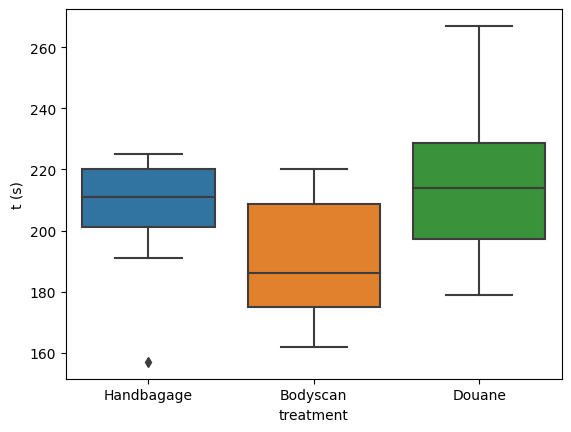

In [9]:
anova.boxplot(ylabel="t (s)")


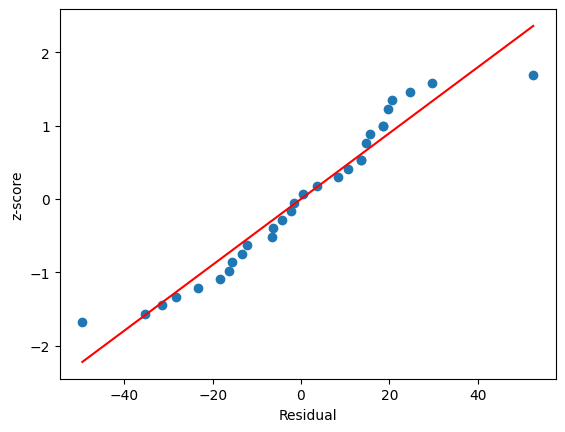

In [10]:
anova.norm_plot()

De metingen volgen significant geen normale verdeling.

# Correlatiecoëfficiënt

Niet zeker wat we moeten bereken
-> verwachting correlatie onderling

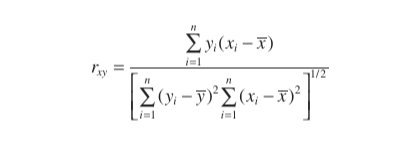

In [11]:
df

,Handbagage,Bodyscan,Douane
0,200,215,218
1,207,174,183
2,191,210,210
3,215,178,225
4,220,162,235
5,205,188,179
6,225,205,230
7,157,220,267
8,220,167,201
9,225,184,196


# Correlatie dubbel checken

In [12]:
r12 = stats.pearsonr(df["Handbagage"].values, df["Bodyscan"].values)
r13 = stats.pearsonr(df["Handbagage"].values, df["Douane"].values)
r23 = stats.pearsonr(df["Bodyscan"].values, df["Douane"].values)


r = [r12[0], r13[0], r23[0]]

r

[-0.666755516250697, -0.48267241442494546, 0.422688952907181]

In [13]:
df.corr()

,Handbagage,Bodyscan,Douane
Handbagage,1.000000,-0.666756,-0.482672
Bodyscan,-0.666756,1.000000,0.422689
Douane,-0.482672,0.422689,1.000000


<Axes: >

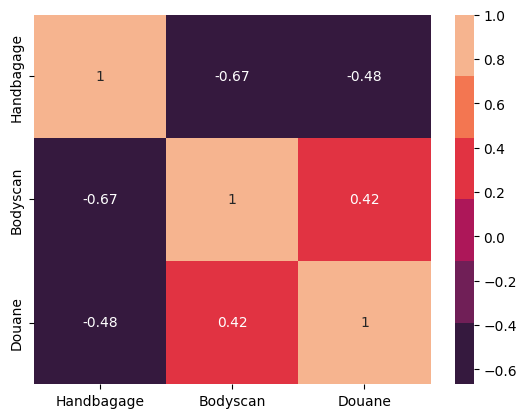

In [14]:
cmap = sns.color_palette('rocket')
sns.heatmap(df.corr(), annot=True, cmap=cmap)

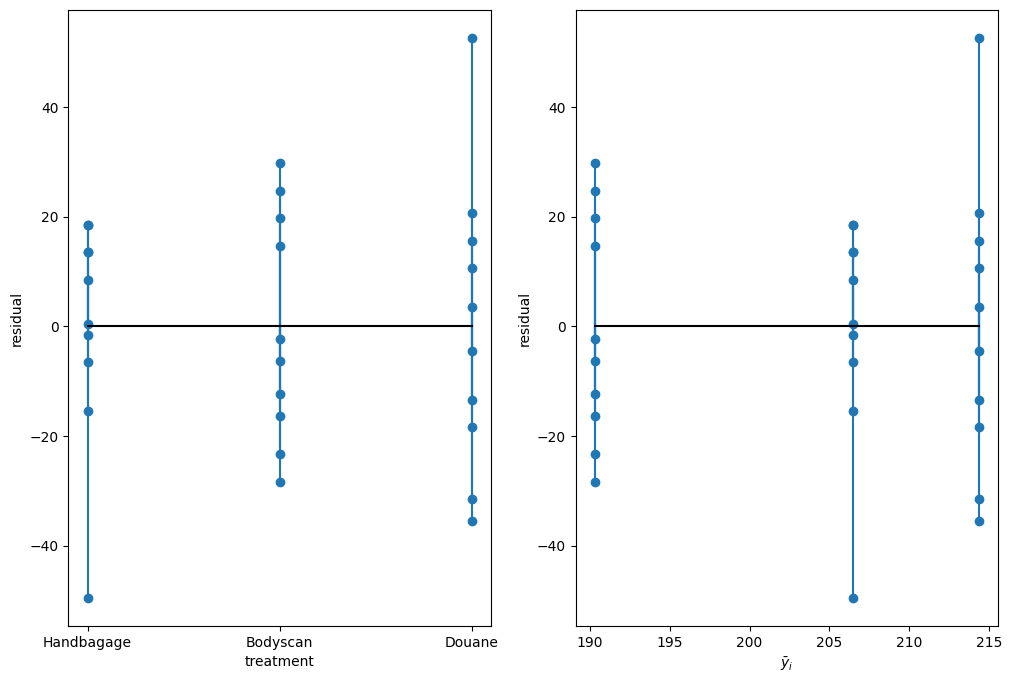

In [15]:
anova.res_plot()

# We gaan ervan uit dat het normaal verdeel is, maar ome Jo vragen.

Ome Jo zei ja.

# Betrouwbaarheidsinterval gemiddelde van populatie

In [16]:
t = stats.t.ppf(1-alpha/2, df=9)

$$\bar{x} - t \frac{s}{\sqrt{n}} < \mu < \bar{x} + t \frac{s}{\sqrt{n}}$$

In [17]:
xmin = means - t*stds/(np.sqrt(n))
xmax = means + t*stds/(np.sqrt(n))

print(xmin, "\n", xmax)


186.64749790831127 
 220.81916875835537


$$ 186,65 < \mu < 220,82 $$

# Bepaling van uitschieters

In [18]:
q1 = df["Handbagage"].quantile(0.25)
q3 = df["Handbagage"].quantile(0.75)

IQR = q3-q1

outliers = df["Handbagage"][((df["Handbagage"]<(q1-1.5*IQR)) | (df["Handbagage"]>(q3+1.5*IQR)))]
outliers

7    157
Name: Handbagage, dtype: int64

uitschieter van $157$

In [19]:
q1 = df["Bodyscan"].quantile(0.25)
q3 = df["Bodyscan"].quantile(0.75)

IQR = q3-q1

outliers = df["Bodyscan"][((df["Bodyscan"]<(q1-1.5*IQR)) | (df["Bodyscan"]>(q3+1.5*IQR)))]
outliers

Series([], Name: Bodyscan, dtype: int64)

In [20]:
q1 = df["Douane"].quantile(0.25)
q3 = df["Douane"].quantile(0.75)

IQR = q3-q1

outliers = df["Douane"][((df["Douane"]<(q1-1.5*IQR)) | (df["Douane"]>(q3+1.5*IQR)))]
outliers

Series([], Name: Douane, dtype: int64)

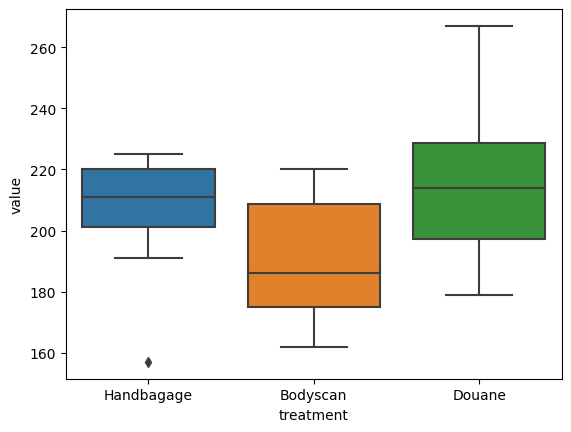

In [21]:
anova.boxplot()

# Skewness en kurtosis

$$sk = \frac{3 \bar{x} - Md}{s}$$

$Md$ = Mediaan


Op pearson manier

## Skew + Kurt voor alle metingen

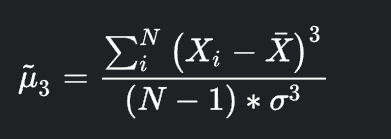

Kurtosis op fisher en pearson manier

In [22]:
skew = stats.skew(df_melt['value'].values)
skew

0.10794195429571911

In [23]:
kurt = stats.kurtosis(df_melt['value'].values, fisher=False)
kurt

3.07286319087321

$$skewness = 0,11$$
$$kurtosis = 3,07$$

### Visuele verdeling

Het aantal bins dat je mag gebruiken in de histogram is bepaald door de 

- Hierbij is een kernel density plot (KDE) gebruikt.
- Aantal bins die gebruikt is 5 ($\sqrt{30} = 5,48$ en dan naar beneden afronden)

<Axes: xlabel='value', ylabel='Count'>

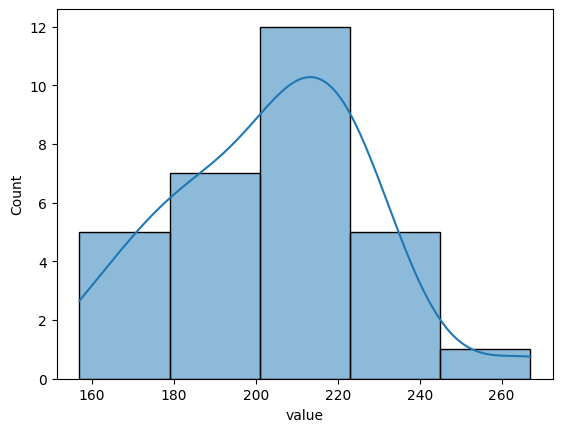

In [60]:
sns.histplot(data=df_melt, x='value', kde=True, bins=5)

## Skewness per treatment

In [33]:
skew1 = stats.skew(df_melt[df_melt.treatment=="Handbagage"].value.values)
skew2 = stats.skew(df_melt[df_melt.treatment=="Bodyscan"].value.values)
skew3 = stats.skew(df_melt[df_melt.treatment=="Douane"].value.values)

skew1, skew2, skew3

(-1.4140441531969925, 0.13389595370319946, 0.4718816743658887)

### Handbagage

$$skewness = -1,41$$

### Bodyscan

$$skewness = 0,13$$

### Douane

$$skewness = 0,47$$

## Kurtosis per treatment

In [36]:
kurt1 = stats.kurtosis(df_melt[df_melt.treatment=="Handbagage"].value.values, fisher=False)
kurt2 = stats.kurtosis(df_melt[df_melt.treatment=="Bodyscan"].value.values, fisher=False)
kurt3 = stats.kurtosis(df_melt[df_melt.treatment=="Douane"].value.values, fisher=False)

kurt1, kurt2, kurt3



(4.282478479835955, 1.562313621504056, 2.6393113225770537)

### Handbagage

$$kurtosis = 4,28$$

### Bodyscan

$$kurtosis = 1,56$$


### Douane

$$kurtosis = 2,64$$

# Visuele weergave per treatment

- Ook hier KDE gebruikt.
- Aantal bins gebruikt is 3 ($\sqrt{10} = 3,16$ en dan naar beneden afronden).
- Zijn echter niet reprecentatief want er zijn te weining metingen dus je hebt te weinig bins om er een conclusie uit te trekken.

In [62]:
np.sqrt(10)

3.1622776601683795

## Handbagage

<Axes: xlabel='value', ylabel='Count'>

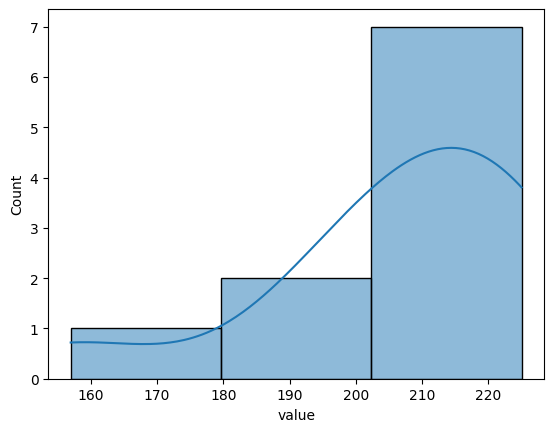

In [57]:
sns.histplot(data = df_melt[df_melt.treatment=="Handbagage"], x = 'value', bins=3, kde=True)

## Bodyscan

<Axes: xlabel='value', ylabel='Count'>

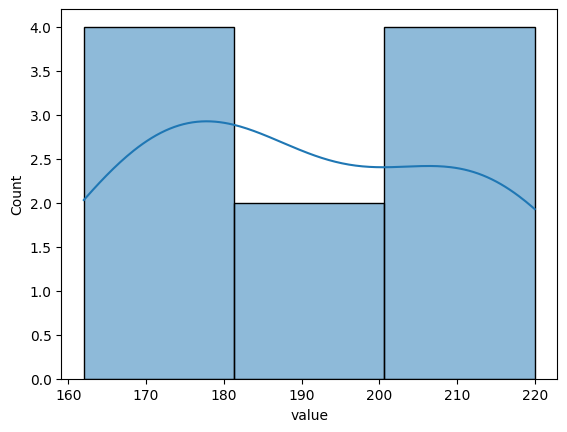

In [56]:
sns.histplot(data = df_melt[df_melt.treatment=="Bodyscan"], x = 'value', bins=3, kde=True)

## Douane

<Axes: xlabel='value', ylabel='Count'>

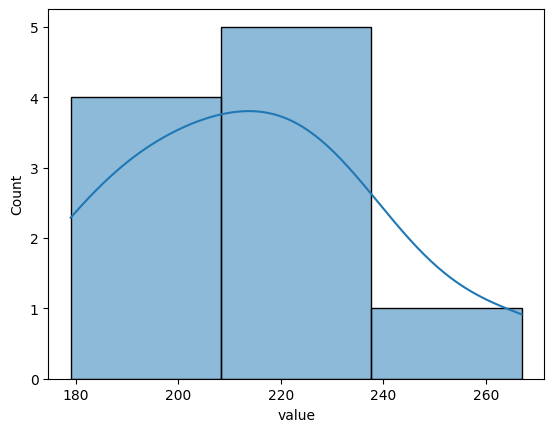

In [55]:
sns.histplot(data = df_melt[df_melt.treatment=="Douane"], x = 'value', bins=3, kde=True)

# Antwoorden van ome Jo

Waarom is kurtosis zo verschillend en welke manier moeten we gebruiken?

- Fisher methode voor discrete metingen
- Pearson methode voor continu metingen (in ons geval van toepassing)

# Bepaling van steekproefomvang

- gebruik van t-verdeling, $s^2$

$$n \geq \frac{t^2 \sigma^2}{a^2}$$

In [ ]:
t = stats.t.ppf(1-alpha/2, n, a)
std

[19.63797341886377, 19.753733824267247, 25.17220689570146]

In [ ]:
a = np.linspace(10,100, 500)
n1 = stds**2 * t**2/a**2
dnda = -2*t**2*stds**2/a**3

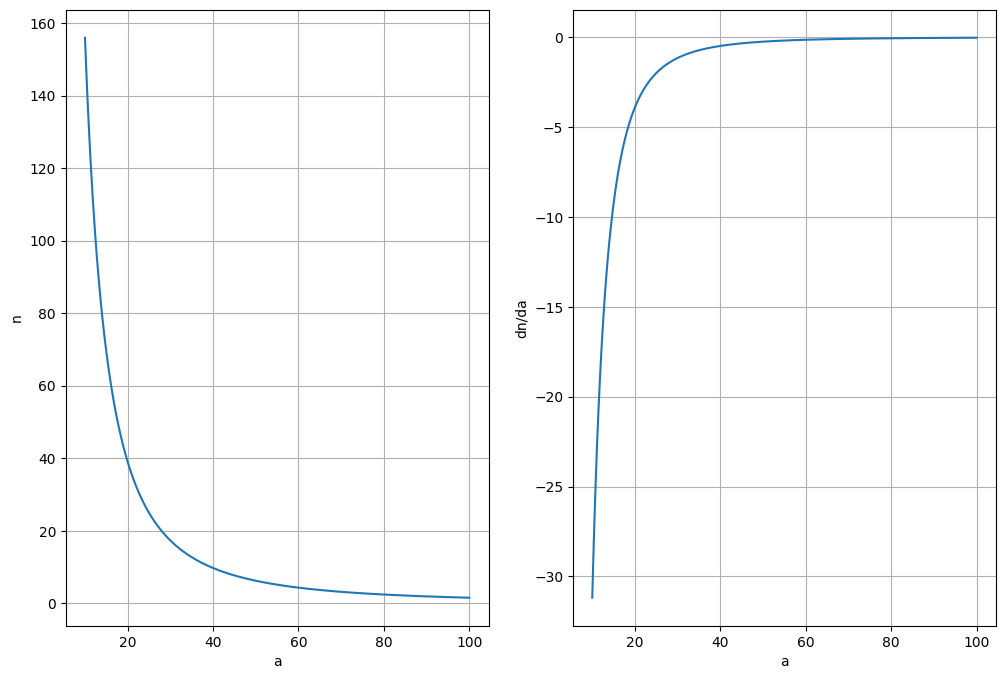

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8))
ax1.grid(True)
ax2.grid(True)
ax1.plot(a,n1)
ax1.set_xlabel("a")
ax1.set_ylabel("n")
ax2.plot(a,dnda)
ax2.set_xlabel("a")
ax2.set_ylabel("dn/da")
plt.show()


# Toetsen



In [ ]:
df

,Handbagage,Bodyscan,Douane
0,200,215,218
1,207,174,183
2,191,210,210
3,215,178,225
4,220,162,235
5,205,188,179
6,225,205,230
7,157,220,267
8,220,167,201
9,225,184,196


In [ ]:
print(xmin, xmax)

186.64749790831127 220.81916875835537


$$\mu = \bar{x} \pm t \frac{s}{\sqrt{n}}$$

acceptatiegebied = betrouwbaarheidsinterval

H0: $$\mu_{i} = \mu$$
H1: $$\mu_{i} \neq \mu$$

$$s = \sqrt{\frac{1}{n-1} \sum \left(x - \bar{x}\right)^2}$$

In [ ]:
mean

[206.5, 190.3, 214.4]

### Rekenen met betrouwbaarheidsintervallen, maar vraag voor ome Jo.

In [ ]:
mu_min = []
mu_max = []
for i in range(len(mean)):
    x_min = mean[i] - t*std[i]/(np.sqrt(n))
    x_max = mean[i] + t*std[i]/(np.sqrt(n))
    mu_min.append(x_min)
    mu_max.append(x_max)

mu_i = np.array([mu_min, mu_max])
mu_i = mu_i.T
mu = np.array([xmin, xmax]).T
print(mu_i)
print("----")
print(mu)

[[174.03287888 238.96712112]
 [157.64149421 222.95850579]
 [172.78322658 256.01677342]]
----
[186.64749791 220.81916876]


In [ ]:
mu_i[0]

array([174.03287888, 238.96712112])

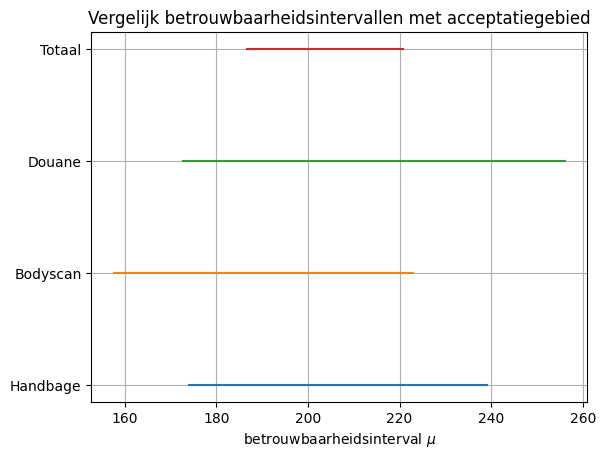

In [ ]:
fig, ax = plt.subplots(1,1)
ax.grid(True)
ax.plot(mu_i[0], [1,1])
ax.plot(mu_i[1], [2,2])
ax.plot(mu_i[2], [3,3])
ax.plot(mu, [4,4])
plt.yticks([1, 2, 3, 4], ["Handbage", "Bodyscan", "Douane", "Totaal"])
ax.set_xlabel(r"betrouwbaarheidsinterval $\mu$")
ax.set_title("Vergelijk betrouwbaarheidsintervallen met acceptatiegebied")

plt.show()

Ome Jo vragen of dit goed is, en hoe dit geïntepreteerd moet worden. 

3 verschillende stations met 3 verschillende mean + std

$\mu$'s toetsen dmv. verschil bepalen tussen betrouwbaarheidsintervallen verschillende treatments.

In [ ]:
min12 = mu_i[0][0] - mu_i[1][0]
max12 = mu_i[1][1] - mu_i[0][1]

min13 = mu_i[2][0] - mu_i[0][0]
max13 = mu_i[2][1] - mu_i[0][1]

min23 = mu_i[1][0] - mu_i[2][0]
max23 = mu_i[2][1] - mu_i[1][1]

interval = np.array([[min12, max12], [min13, max13], [min23, max23]])
interval

array([[ 16.39138467, -16.00861533],
       [ -1.2496523 ,  17.0496523 ],
       [-15.14173238,  33.05826762]])

In [ ]:
interval[0][0]

16.391384672077407

In [ ]:
from IPython.display import Markdown as md
md(f"1-2: $${interval[0][1].round(2)} \leq \mu \leq{interval[0][0].round(2)}$$")


1-2: $$-16.01 \leq \mu \leq16.39$$

In [ ]:
md(f"1-3: $${interval[1][0].round(2)} \leq \mu \leq{interval[1][1].round(2)}$$")


1-3: $$-1.25 \leq \mu \leq17.05$$

In [ ]:
md(f"2-3: $${interval[2][0].round(2)} \leq \mu \leq{interval[2][1].round(2)}$$")

2-3: $$-15.14 \leq \mu \leq33.06$$

In [ ]:
std

[19.63797341886377, 19.753733824267247, 25.17220689570146]

$s$ is een zuivere schatter voor $\sigma$, dus

$$\sigma = s$$

In [ ]:
sigma = std

std_coeff = [std[0]/std[1], std[0]/std[2], std[1]/std[2]] 
std_coeff

[0.9941398215429396, 0.7801450822421634, 0.7847438210767487]

# Toetsing van variaties

De verhouding van variaties bepalen.

H0: $\sigma_1 = \sigma_2 = \sigma_3 = \sigma$
H1: $\sigma_i \neq \sigma$ voor minimaal één.

Als je de variaties door elkaar deelt moet 1 uitkomen.

In [ ]:
md("1-2: $$\\frac{\sigma_1}{\sigma_2} = %.2f$$" % std_coeff[0])

1-2: $$\frac{\sigma_1}{\sigma_2} = 0.99$$

In [ ]:
md("1-3: $$\\frac{\sigma_1}{\sigma_3} = %.2f$$" % std_coeff[1])

1-3: $$\frac{\sigma_1}{\sigma_3} = 0.78$$

In [ ]:
md("2-3: $$\\frac{\sigma_2}{\sigma_3} = %.2f$$" % std_coeff[2])

2-3: $$\frac{\sigma_2}{\sigma_3} = 0.78$$

# Overschrijdingsvermogen

theoretisch: 

H0: $\mu_i = $

H1: $\mu_i \neq \mu_t$

Werkelijk:

H0: $\mu_j = \mu_w$

H1: $\mu_j \neq \mu_w$

# 1-2

In [ ]:
mu_i, mean

(array([[174.03287888, 238.96712112],
        [157.64149421, 222.95850579],
        [172.78322658, 256.01677342]]),
 [206.5, 190.3, 214.4])

In [ ]:
z1 = (mu_i[0][0] - mean[1])/sigma[1]
z2 = (mu_i[0][1] - mean[1])/sigma[1]
print(z1, z2)

-0.8234960166947981 2.4636922595031794


In [ ]:
p1 = stats.norm.sf(abs(z1))
p2 = stats.norm.sf(abs(z2))
beta12 = p1+p2
beta12

0.21198869686288763

# 1-3

In [ ]:
z1 = (mu_i[0][0] - mean[2])/sigma[2]
z2 = (mu_i[0][1] - mean[2])/sigma[2]
print(z1, z2)

-1.6036385401721243 0.9759621482901674


In [ ]:
p1 = stats.norm.sf(abs(z1))
p2 = stats.norm.sf(abs(z2))
beta13 = p1+p2
beta13

0.21893848629878643

# 2-3

In [ ]:
z1 = (mu_i[1][0] - mean[2])/sigma[2]
z2 = (mu_i[1][1] - mean[2])/sigma[2]
print(z1, z2)

-2.2548084888378686 0.3399982300587354


In [ ]:
p1 = stats.norm.sf(abs(z1))
p2 = stats.norm.sf(abs(z2))
beta23 = p1+p2
beta23

0.37900160652451553

$1-\beta$ = de kans P(z < linkergrens handbagage) + P(z > rechtergrens handbagage)